In [1]:
%load_ext autoreload
%autoreload 2


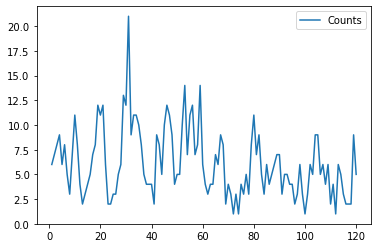

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv("trees.csv",index_col=[0])
df.plot()
plt.show()

In [182]:

n=len(df.values)
#Initialise order for INARMA(p,q)
q_init=1
p_init=2

#Initialise alpha_1,...,alpha_p,beta_1,...,beta_q,lambda
alpha=np.repeat(1/(p_init+1),p_init)
beta=np.repeat(1/(q_init+1),q_init)
lam=1

#Initalise augmented data
y=np.zeros([n,p_init])
v=np.zeros([n,q_init])
z= np.array(df.values)
x_data=df.values
#Set maximum order
p_max=4
q_max=4
N_reps=20

In [183]:
from INARMA_RJMCMC import inarma_rjmcmc


In [218]:
order_count, alphas,betas,lams =inarma_rjmcmc(x_data,init_augs,init_pars,init_order,order_max,N_reps)

/home/flettj/INARMA_RJMCMC_py/INARMA_backend.py:106: RuntimeWarning: invalid value encountered in true_divide
  A=dist.pmf(zprop[t])/dist.pmf(z[t])
/home/flettj/INARMA_RJMCMC_py/INARMA_backend.py:276: RuntimeWarning: invalid value encountered in true_divide
  prob *= poisson(lamprop).pmf(zprop[t])/(poisson(lam).pmf(z[t])*binom(x_data[t-1],alphas[0]).pmf(y[t,0]))


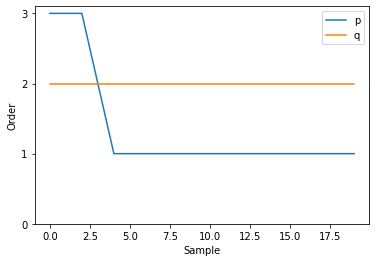

In [219]:
# plot order
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(order_count)
ax.set(title='', ylabel='Order', xlabel='Sample')
ax.legend(labels = ["p","q"])
ax.yaxis.set(ticks=range(0,max(p_max,q_max)))
plt.show()

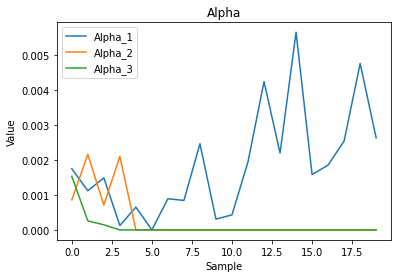

In [220]:

# plot alpha
max_p = max(order_count[0,])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(alphas)
ax.set(title='Alpha', ylabel='Value', xlabel='Sample')

alpha_lab=[]
for i in range(0,max_p): alpha_lab.append("Alpha_%i" %(i+1) )
ax.legend(loc = "best",labels = alpha_lab)
plt.show()

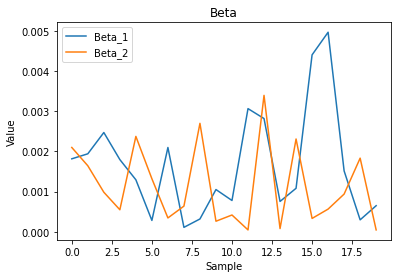

In [221]:
# plot beta
max_q = max(order_count[1,])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(betas)
ax.set(title='Beta', ylabel='Value', xlabel='Sample')

beta_lab=[]
for i in range(0,max_p): beta_lab.append("Beta_%i" %(i+1) )
ax.legend(loc = "best",labels = beta_lab)
plt.show()

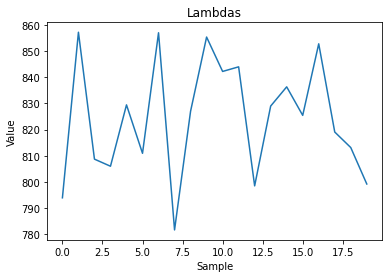

In [222]:
# plot lambda
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lams)
ax.set(title='Lambdas', ylabel='Value', xlabel='Sample')
plt.show()